In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

In [ ]:
df = pd.read_excel('/content/mpu6050_readings_par.xlsx')

In [ ]:
df['timestamp'] = pd.date_range(start='2023-01-01', periods=len(df), freq='10L')
df.set_index('timestamp', inplace=True)

In [ ]:
# Assuming 'df' is your DataFrame and you've already set the 'timestamp' as the index
df['timestamp'] = df.index

# Reset the index to move 'timestamp' back to a column
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,ax,ay,az,gx,gy,gz,timestamp
0,-832,-11136,17780,-3118,-4958,1911,2023-01-01 00:00:00.000
1,-524,-11244,17372,-3269,-5479,1748,2023-01-01 00:00:00.010
2,112,-11480,16208,-3140,-5824,1816,2023-01-01 00:00:00.020
3,-6576,-14756,28200,-24135,12367,9395,2023-01-01 00:00:00.030
4,-6664,-17084,29420,-23482,12189,8895,2023-01-01 00:00:00.040
...,...,...,...,...,...,...,...
1878,-1600,11932,10576,-768,6,-136,2023-01-01 00:00:18.780
1879,-1592,12152,10568,-702,35,-185,2023-01-01 00:00:18.790
1880,-2116,12508,10480,-102,1647,-1972,2023-01-01 00:00:18.800
1881,-2016,12464,10512,66,1601,-1730,2023-01-01 00:00:18.810


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ax         1883 non-null   int64         
 1   ay         1883 non-null   int64         
 2   az         1883 non-null   int64         
 3   gx         1883 non-null   int64         
 4   gy         1883 non-null   int64         
 5   gz         1883 non-null   int64         
 6   timestamp  1883 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(6)
memory usage: 103.1 KB


In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)

<ipython-input-7-559db1b78239>:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format=True)


array([<Axes: xlabel='timestamp'>, <Axes: xlabel='timestamp'>,
       <Axes: xlabel='timestamp'>], dtype=object)

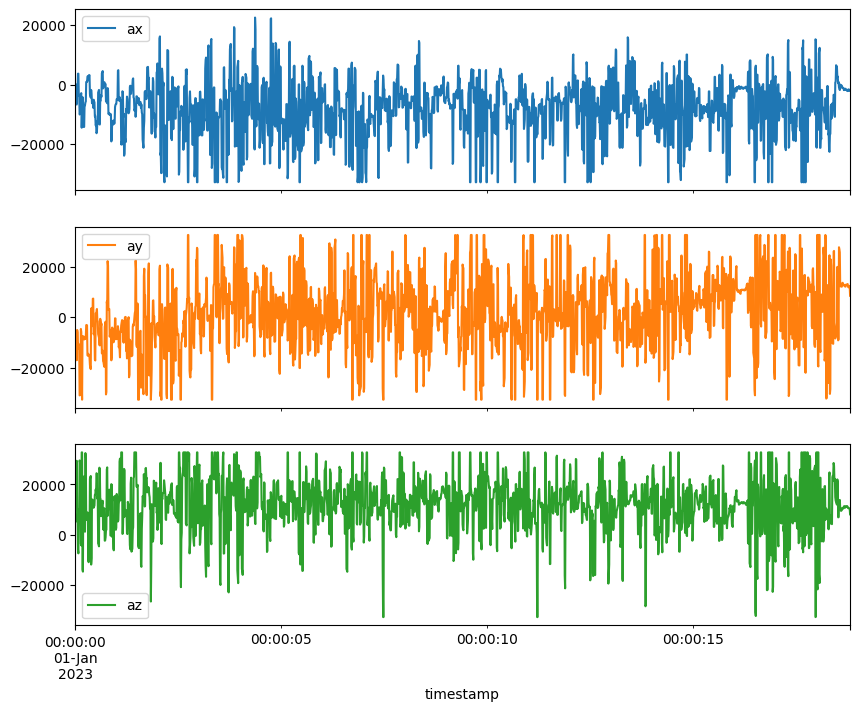

In [ ]:
df.set_index('timestamp')[['ax', 'ay','az']].plot(subplots=True)

In [ ]:
df_input=df[['ax','ay', 'az', 'gx','gy','gz']]

In [ ]:
df_input

,ax,ay,az,gx,gy,gz
0,-832,-11136,17780,-3118,-4958,1911
1,-524,-11244,17372,-3269,-5479,1748
2,112,-11480,16208,-3140,-5824,1816
3,-6576,-14756,28200,-24135,12367,9395
4,-6664,-17084,29420,-23482,12189,8895
...,...,...,...,...,...,...
1878,-1600,11932,10576,-768,6,-136
1879,-1592,12152,10568,-702,35,-185
1880,-2116,12508,10480,-102,1647,-1972
1881,-2016,12464,10512,66,1601,-1730


In [ ]:
df_input.describe()

,ax,ay,az,gx,gy,gz
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,-8008.395114,1949.238980,11806.479023,-289.472119,-235.898566,276.556028
std,10007.676035,15366.305573,11436.237664,14746.830036,16986.232382,14364.071815
min,-32768.000000,-32768.000000,-32768.000000,-32768.000000,-32768.000000,-32768.000000
25%,-13322.000000,-8026.000000,5314.000000,-8723.500000,-9412.000000,-8498.000000
50%,-6820.000000,2080.000000,12364.000000,78.000000,478.000000,-295.000000
75%,-1388.000000,12226.000000,18894.000000,7741.500000,9843.000000,8765.500000
max,22520.000000,32767.000000,32767.000000,32767.000000,32767.000000,32767.000000


In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[0.57762987, 0.33008316, 0.77131304, 0.45243   , 0.4243534 ,
        0.52916762],
       [0.58320069, 0.32843519, 0.76508736, 0.45012589, 0.41640345,
        0.5266804 ],
       [0.59470409, 0.32483406, 0.74732586, 0.4520943 , 0.41113909,
        0.52771801],
       ...,
       [0.55440602, 0.69086748, 0.65992218, 0.49845121, 0.52513924,
        0.46991684],
       [0.55621473, 0.69019608, 0.66041047, 0.50101472, 0.52443732,
        0.47360952],
       [0.5578064 , 0.630869  , 0.62372778, 0.49184405, 0.71407645,
        0.49465171]])

In [ ]:
features=data_scaled
target=data_scaled[:,0]

In [ ]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.57762987, 0.33008316, 0.77131304, 0.45243   , 0.4243534 ,
          0.52916762],
         [0.58320069, 0.32843519, 0.76508736, 0.45012589, 0.41640345,
          0.5266804 ]]]),
 array([0.59470409]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [ ]:
x_train.shape

(1506, 6)

In [ ]:
x_test.shape

(377, 6)

In [ ]:
win_length=30
batch_size=32
num_features=6
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.57762987, 0.33008316, 0.77131304, 0.45243   , 0.4243534 ,
          0.52916762],
         [0.58320069, 0.32843519, 0.76508736, 0.45012589, 0.41640345,
          0.5266804 ],
         [0.59470409, 0.32483406, 0.74732586, 0.4520943 , 0.41113909,
          0.52771801],
         ...,
         [0.60895674, 0.45239948, 0.58966964, 0.42452125, 0.26987106,
          0.50585183],
         [0.60996961, 0.45349813, 0.59211109, 0.42279698, 0.27293812,
          0.51276417],
         [0.60902908, 0.45105669, 0.59436942, 0.41866178, 0.27396048,
          0.51766232]],
 
        [[0.58320069, 0.32843519, 0.76508736, 0.45012589, 0.41640345,
          0.5266804 ],
         [0.59470409, 0.32483406, 0.74732586, 0.4520943 , 0.41113909,
          0.52771801],
         [0.47373752, 0.2748455 , 0.93031205, 0.13173114, 0.68871595,
          0.64336614],
         ...,
         [0.60996961, 0.45349813, 0.59211109, 0.42279698, 0.27293812,
          0.51276417],
         [0.60902908, 0.45105669, 0.594

In [ ]:
#model = tf.keras.Sequential()
#model.add(tf.keras.layers.LSTM(32, input_shape= (win_length, num_features), return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
#model.add(tf.keras.layers.LSTM(32, return_sequences=True))
#model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
#model.add(tf.keras.layers.Dropout(0.3))
#model.add(tf.keras.layers.LSTM(16, return_sequences=False))
#model.add(tf.keras.layers.Dropout(0.3))
#model.add(tf.keras.layers.Dense(1))

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.layers import Attention
#attention = Attention()([lstm_output, lstm_output])
'''
model = tf.keras.Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(win_length, num_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)))  # Increase units
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(256, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(128, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1)) '''




#optimizer = tf.keras.optimizers.Adam(clipnorm=1.0)

"\nmodel = tf.keras.Sequential()\nmodel.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(win_length, num_features)))\nmodel.add(MaxPooling1D(pool_size=2))\nmodel.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)))  # Increase units\nmodel.add(tf.keras.layers.LeakyReLU(alpha=0.5))\nmodel.add(tf.keras.layers.LSTM(256, return_sequences=True))\nmodel.add(tf.keras.layers.LeakyReLU(alpha=0.5))\nmodel.add(tf.keras.layers.Dropout(0.3))\nmodel.add(tf.keras.layers.LSTM(128, return_sequences=False))\nmodel.add(tf.keras.layers.Dropout(0.3))\nmodel.add(tf.keras.layers.Dense(1)) "

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Attention, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, Bidirectional, LeakyReLU

# Define input layer
input_layer = Input(shape=(win_length, num_features))

# Convolution and MaxPooling layers
x = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
x = MaxPooling1D(pool_size=2)(x)

# LSTM layers
x = Bidirectional(LSTM(256, return_sequences=True))(x)
x = LeakyReLU(alpha=0.5)(x)
x = LSTM(128, return_sequences=True)(x)
x = LeakyReLU(alpha=0.5)(x)
x = LSTM(256, return_sequences=True)(x)


# Attention mechanism
attention = Attention()([x, x])

# Combine LSTM output and attention output
combined = Concatenate()([x, attention])

# More LSTM layers after attention
x = LSTM(128, return_sequences=False)(combined)
x = Dropout(0.3)(x)

# Output layer
output_layer = Dense(1)(x)

# Define the model
model = Model(inputs=input_layer, outputs=output_layer)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 30, 6)          │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 28, 64)         │          1,216 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling1d             │ (None, 14, 64)         │              0 │ conv1d[0][0]           │
│ (MaxPooling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional             │ (None, 14, 512)        │        657,408 │ max_pooling1d[0][0]    │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu (LeakyReLU)   │ (None, 14, 512)        │              0 │ bidirectional[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_1 (LSTM)             │ (None, 14, 128)        │        328,192 │ leaky_re_lu[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ leaky_re_lu_1 (LeakyReLU) │ (None, 14, 128)        │              0 │ lstm_1[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_2 (LSTM)             │ (None, 14, 256)        │        394,240 │ leaky_re_lu_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ attention (Attention)     │ (None, 14, 256)        │              0 │ lstm_2[0][0],          │
│                           │                        │                │ lstm_2[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 14, 512)        │              0 │ lstm_2[0][0],          │
│                           │                        │                │ attention[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lstm_3 (LSTM)             │ (None, 128)            │        328,192 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 128)            │              0 │ lstm_3[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 1)              │            129 │ dropout[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,709,377 (6.52 MB)

 Trainable params: 1,709,377 (6.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#optimizer = tf.keras.optimizers.Adam(clipnorm=2)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=3,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
             optimizer=tf.optimizers.Adam(learning_rate=0.001),
              metrics=[tf.metrics.MeanAbsoluteError()])


history = model.fit(train_generator, epochs=45,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/45


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - loss: 0.0702 - mean_absolute_error: 0.2118 - val_loss: 0.0464 - val_mean_absolute_error: 0.1838
Epoch 2/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0404 - mean_absolute_error: 0.1591 - val_loss: 0.0351 - val_mean_absolute_error: 0.1529
Epoch 3/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0356 - mean_absolute_error: 0.1483 - val_loss: 0.0339 - val_mean_absolute_error: 0.1482
Epoch 4/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0348 - mean_absolute_error: 0.1460 - val_loss: 0.0340 - val_mean_absolute_error: 0.1487
Epoch 5/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0338 - mean_absolute_error: 0.1430 - val_loss: 0.0354 - val_mean_absolute_error: 0.1535
Epoch 6/45
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0332 - mean_absolute_error: 0.1415 - val_loss: 0.0339 - val_mean_absolute_error: 0.1456


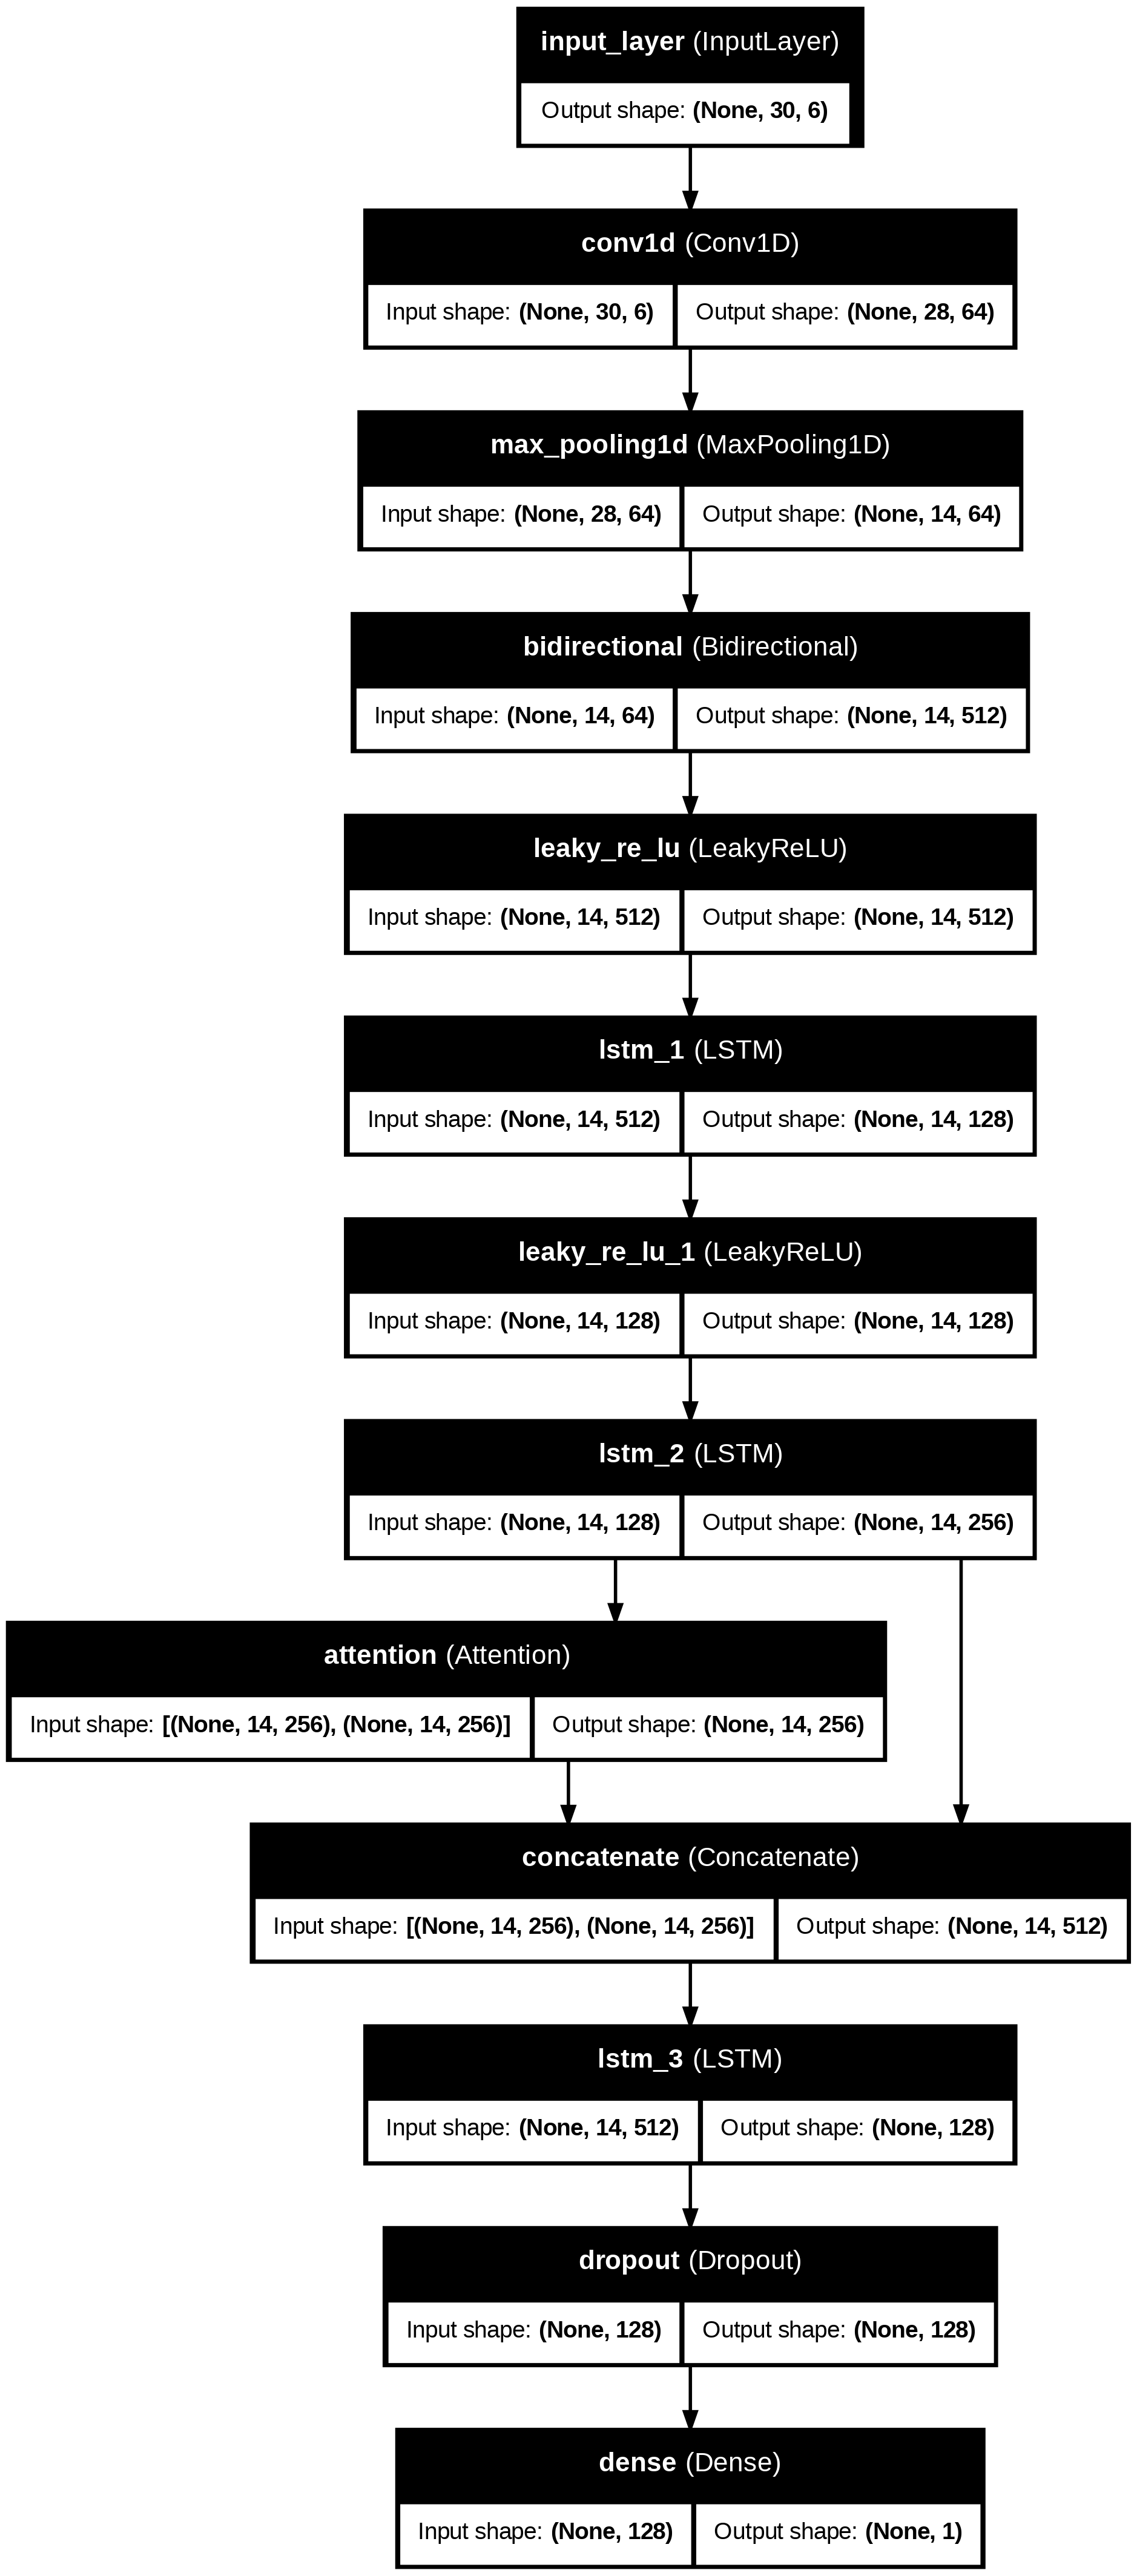

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

# Generate the plot
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the plot in the notebook
Image('model_architecture.png')

In [ ]:
model.evaluate(test_generator, verbose=0)

[0.033931855112314224, 0.1456415355205536]

In [ ]:
predictions=model.predict(test_generator)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step


In [ ]:
predictions.shape[0]

347

In [ ]:
x_test[:,1:][win_length:]

array([[0.8037232 , 0.67426566, 0.24487678, 0.70014496, 0.68651865],
       [0.42230869, 0.59674983, 0.58318456, 0.35443656, 0.41791409],
       [0.42127108, 0.6019379 , 0.60749218, 0.36849012, 0.40569162],
       ...,
       [0.69086748, 0.65992218, 0.49845121, 0.52513924, 0.46991684],
       [0.69019608, 0.66041047, 0.50101472, 0.52443732, 0.47360952],
       [0.630869  , 0.62372778, 0.49184405, 0.71407645, 0.49465171]])

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final['Model Prediction']=rev_trans[:,0]

<ipython-input-34-671aba0055a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Model Prediction']=rev_trans[:,0]


<Axes: >

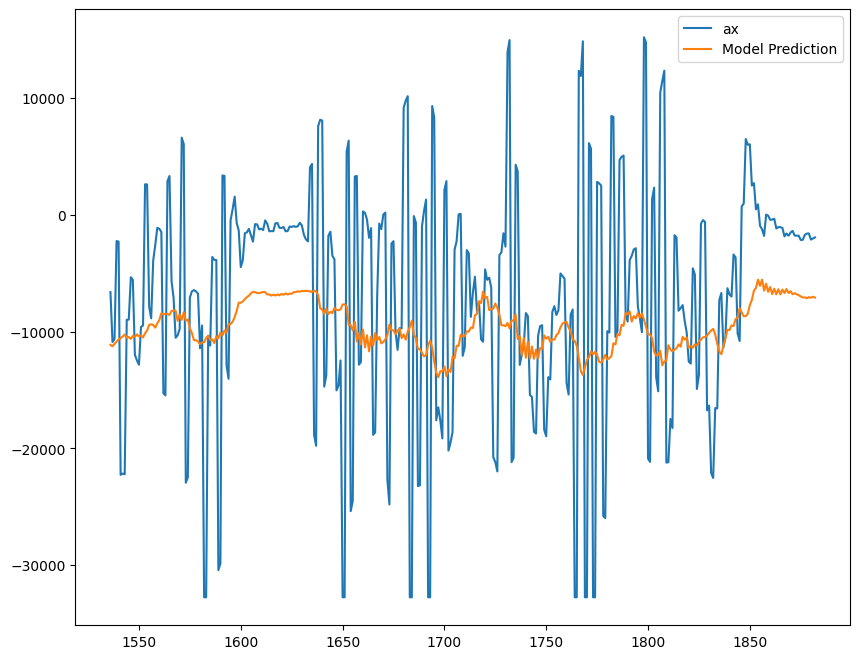

In [ ]:
df_final[['ax','Model Prediction']].plot()

In [ ]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

# Set the default theme and template for the plots
pio.templates.default = "plotly_white"

# Create traces
trace1 = go.Scatter(x=df_final.index, y=df_final['ax'], mode='lines', name='actual_ax', line=dict(width=2.5))
trace2 = go.Scatter(x=df_final.index, y=df_final['Model Prediction'], mode='lines', name='Model Prediction', line=dict(width=2.5))

# Create layout
layout = go.Layout(
    title='Tremor Prediction vs Actual Data',
    xaxis=dict(title='Index', range=[df_final.index.min(), df_final.index.max()]),
    yaxis=dict(title='Values'),
    width=900,
    height=600,
    showlegend=True
)

# Combine traces and layout into a figure
fig = go.Figure(data=[trace1, trace2], layout=layout)

# Display the figure
fig.show()



In [ ]:
model.save('lstm_3.h5')

In [ ]:
initial_sequence = df_input[1:30]  # This would include all rows from 0 to 29


In [ ]:
from collections import deque

In [ ]:
last_batch = deque(train_generator, maxlen=1).pop()[0]
initial_sequence = last_batch[-1]  # This gets the last sequence in the batch


KeyboardInterrupt: 

In [ ]:
initial_sequence = df_input[0:1500]  # Get the last `win_length` time steps from your data


In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('/content/lstm_3.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


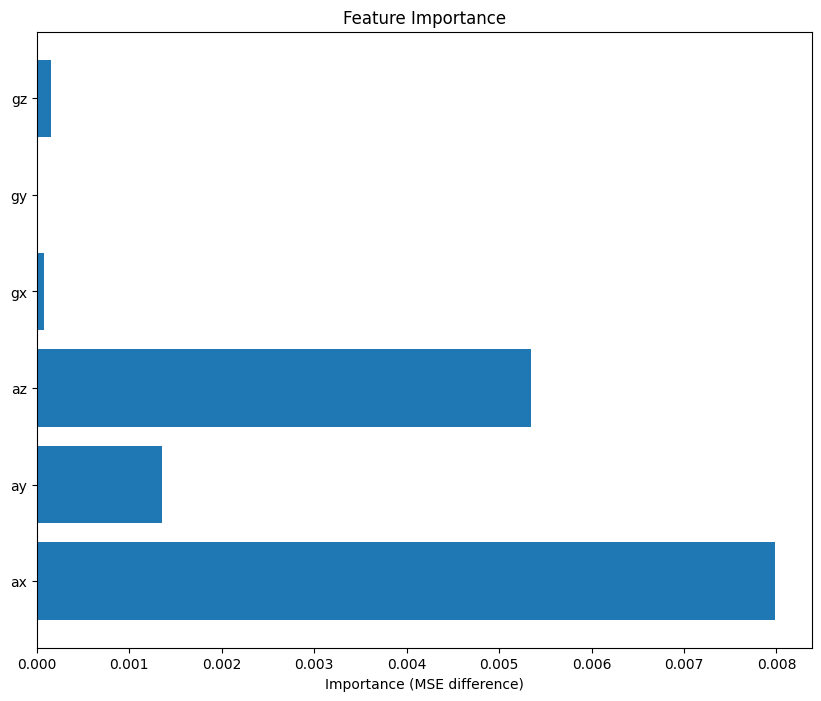

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def feature_importance_analysis(model, initial_sequence, feature_names, scaler):
    importance = []
    baseline_prediction = model.predict(np.expand_dims(initial_sequence, axis=0))

    for i in range(initial_sequence.shape[1]):  # iterate over features
        temp_sequence = np.copy(initial_sequence)
        temp_sequence[:, i] = 0  # zero out the feature

        temp_prediction = model.predict(np.expand_dims(temp_sequence, axis=0))
        importance.append(mean_squared_error(baseline_prediction, temp_prediction))

    importance = np.array(importance)

    # Plot feature importance
    plt.barh(feature_names, importance)
    plt.xlabel('Importance (MSE difference)')
    plt.title('Feature Importance')
    plt.show()

# Assuming initial_sequence is your sequence and feature_names is a list of feature names
feature_names = ['ax', 'ay', 'az', 'gx', 'gy', 'gz']
feature_importance_analysis(model, initial_sequence, feature_names, scaler)


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
import numpy as np

# Assuming x_train and y_train are your features and labels, and model is your Keras model
n_splits = 5  # Number of folds
kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

all_y_true = []
all_y_scores = []

for train_index, val_index in kf.split(x_train, y_train):
    # Split the data
    X_train_fold, X_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Reinitialize the model (important to start fresh for each fold)
    model = build_model()  # This should be a function that creates your Keras model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)

    # Predict probabilities for the validation set
    y_scores = model.predict(X_val_fold)

    # Store the true labels and predicted scores
    all_y_true.extend(y_val_fold)
    all_y_scores.extend(y_scores)

# Convert lists to numpy arrays for metric calculations
all_y_true = np.array(all_y_true)
all_y_scores = np.array(all_y_scores)

# Calculate ROC curve and find optimal threshold
fpr, tpr, thresholds = roc_curve(all_y_true, all_y_scores)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Cross-Validated Optimal Threshold:", optimal_threshold)


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

In [ ]:
# Example new data
new_data = df_input[0:300] # New time-series data
new_data_scaled = scaler.transform(new_data)

# Create sequences from new data
new_data_generator = TimeseriesGenerator(new_data_scaled, np.zeros(300), length=win_length, batch_size=1)

# Predict using the trained model
predictions = model.predict(new_data_generator)

# Threshold to detect patterns (like tremors)
threshold = 0.45
pattern_detected = predictions > threshold


 41/270 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



270/270 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


NameError: name 'ax' is not defined

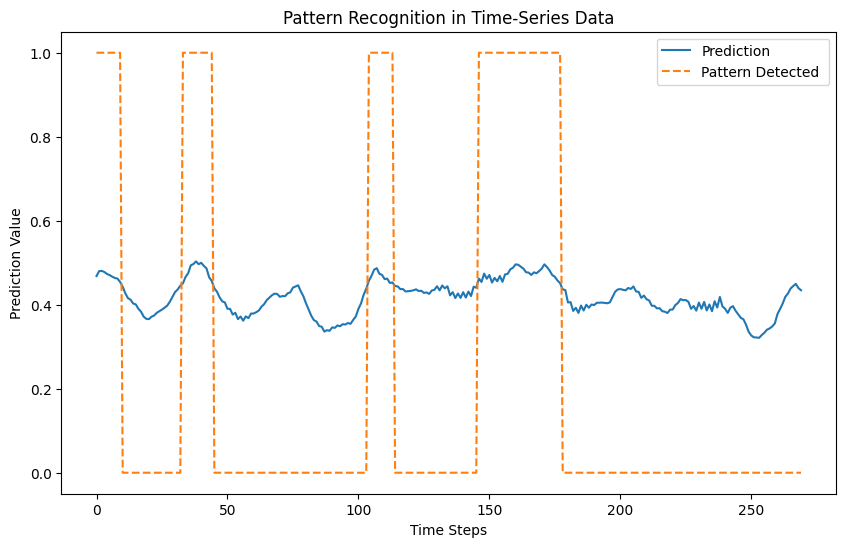

In [ ]:
import matplotlib.pyplot as plt

# Example: visualize the pattern detection results
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Prediction')
plt.plot(pattern_detected, label='Pattern Detected ', linestyle='--')
plt.title('Pattern Recognition in Time-Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Prediction Value')
plt.legend()
plt.show()
